# Колико су честа штетна и ризична понашања?
У последњем делу одељка о јавном здрављу грађана САД позабавићемо се њиховим навикама и понашањима везаним за употребу алкохола, конзумирање марихуане и сексуалне односе. Ови подаци су прикупљени помоћу упитника тако да ћемо за потребе анализе учитати табеле *demographic.csv* и *questionnaire.csv*. Структуру и садржај ових табела прегледали смо у претходним лекцијама, али ћемо ипак приказати првих пар редова како бисмо се подсетили назива неких варијабли. Уочите да комбинована табела `podaciDemUpit` садржи неке демографске варијабле као што је пол (RIAGENDR) и неке варијабле из упитничког скупа као нпр. одговори на ставке упитника о депресији (DPQ090).   

In [1]:
import pandas as pd

podaciDem = pd.read_csv('podaci/demographic.csv')[['SEQN', 'RIDAGEYR', 'RIAGENDR']]
podaciUpit = pd.read_csv('podaci/questionnaire.csv')
podaciDemUpit = pd.merge(podaciDem, podaciUpit, on='SEQN')
podaciDemUpit.head(5)

,SEQN,RIDAGEYR,RIAGENDR,HSD010,SLD010H,PAQ710,PAQ715,PAQ650,PAQ665,SXD031,...,DPQ090,SMQ020,SMD030,SMQ040,SMD650,ALQ101,ALQ110,ALQ120Q,ALQ120U,ALQ130
0,73557,69,1,2.0,7.0,2.0,8.0,2.0,2.0,15.0,...,0.0,1.0,17.0,3.0,0.0,1.0,0.0,1.0,3.0,1.0
1,73558,54,1,4.0,9.0,4.0,8.0,2.0,2.0,14.0,...,0.0,1.0,0.0,2.0,1.0,1.0,0.0,7.0,1.0,4.0
2,73559,72,1,3.0,8.0,4.0,0.0,2.0,1.0,NaN,...,0.0,1.0,20.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0
3,73560,9,1,0.0,NaN,3.0,2.0,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,73561,73,2,5.0,9.0,1.0,1.0,2.0,2.0,NaN,...,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


Да бисмо анализирали учесталост конзумације алкохола међу младима узраста између 14 и 25 година употребићемо одговоре на три питања:
<ol>
<li>ALQ130 - <i>Колико сте алкохолних пића дневно пили у последњих годину дана?</i></li>
<li>ALQ101 - <i>Да ли сте некада у току периода од годину дана попили више од 11 пића?</i> и</li>
<li>ALQ110 - <i>Да ли сте у животу укупно попили више од 11 пића?</i></li>
</ol>

Пре него што исцртате графикон који приказује расподелу одговора на прво питање, размислите о томе колико је важно добро формулисати питање којим се "мери" жељено својство. На пример, прво питање је много корисније од другог и трећег јер ипак говори о актуелним навикама појединца, док се на основу другог и трећег не могу донети употребљиви закључци о томе да ли особа спада у потенцијално ризичну групу конзумената алкохола.   

Пропорција младих који попију барем једно пиће дневно је 0.61.


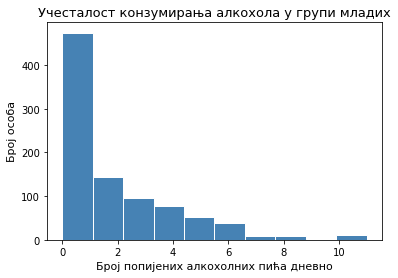

In [2]:
# Издвајамо испитанике старости од 14 до 25 година и уклањамо веома високе вредности уноса алкохола
graf = podaciDemUpit[(podaciDemUpit['RIDAGEYR'].isin(range(14,26))) & (podaciUpit['ALQ130'] < podaciUpit['ALQ130'].quantile(0.99))]['ALQ130'].plot(kind='hist', edgecolor='white', color='steelblue')

# Израчунаћемо проценат особа које попију барем једно пиће дневно (дугачак кôд смо преломили оператором \)
proPiju = podaciDemUpit[(podaciDemUpit['RIDAGEYR'].isin(range(14,26))) & (podaciUpit['ALQ130'] > 0)]['ALQ130'].count() \
    / podaciDemUpit[(podaciDemUpit['RIDAGEYR'].isin(range(14,26)))]['ALQ130'].count()

graf.set_title('Учесталост конзумирања алкохола у групи младих', fontsize=13)
graf.set_xlabel('Број попијених алкохолних пића дневно', fontsize=11)
graf.set_ylabel('Број особа', fontsize=11)

# Употребићемо стринг за форматирање '%0.2f' да бисмо вредност proPiju заокружили на две децимале
print ('Пропорција младих који попију барем једно пиће дневно је ' + '%0.2f' % proPiju + '.')

Иако изглед графикона може да упути на закључак да међу младима не постоји проблем са конзумирањем алкохола, треба узети у обзир искошеност дистрибуције. Категорија испитаника који не пију алкохол јесте најбројнија, али чак 61% младих дневно конзумира једно или више алкохолних пића, што је забрињавајући податак. Погледајмо сада и податке који се тичу одговора на преостала два питања. Овога пута ћемо уз стубичасти дијаграм употребити и тзв. *торта* или *пита дијаграм*. Сâм назив указује на то да се графикон састоји од „парчади“, тј. исечака који говоре о уделу сваке од категорија неке варијабле у укупном узорку. Уобичајено је да се ова врста графикона користи за приказивање учесталости вредности квалитативне и категоријалне варијабле.

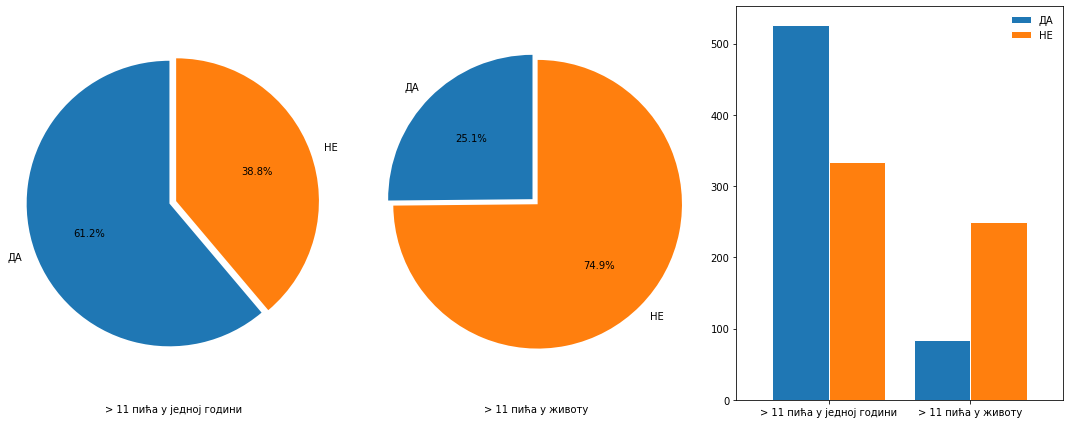

In [3]:
import matplotlib.pyplot as plt

# Да ли су попили више од 11 пића у току године
alkGod = podaciDemUpit[(podaciDemUpit['RIDAGEYR'].isin(range(14,26))) & (podaciDemUpit['ALQ101'].isin([1, 2]))]['ALQ101'].value_counts().sort_index()
# Да ли су попили више од 11 алкохолних пића у току живота
alkZiv = podaciDemUpit[(podaciDemUpit['RIDAGEYR'].isin(range(14,26))) & (podaciDemUpit['ALQ110'].isin([1, 2]))]['ALQ110'].value_counts().sort_index()

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,6))

# Ознаке категорија одговора смештамо у варијаблу oznake
oznake = 'ДА', 'НЕ'
# За колико ћемо изместити сваки одсечак из круга - први не, а други врло мало
isecak = (0, 0.05) 

# Параметром autopct подешавамо формат исписа процента на једну децималу и ознаку процента
ax1.pie(alkGod, explode=isecak, labels=oznake, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')  
ax1.set_xlabel('> 11 пића у једној години')
ax1.set_facecolor('white')

# Параметром startangle подешавамо почетак „сецкања торте“ на 90 степени, тј. врх круга
ax2.pie(alkZiv, explode=isecak, labels=oznake, autopct='%1.1f%%', startangle=90)
ax2.axis('equal')  
ax2.set_xlabel('> 11 пића у животу')

# Обједињујемо скупове да бисмо приказали наслагани стубичасти дијаграм
# При томе ротирамо (транспонујемо) табелу командом .T тако да редови постану колоне и обратно
alk = pd.concat([alkGod, alkZiv], axis = 1).T
alk.plot.bar(ax=ax3, edgecolor='white', width=0.8)
ax3.set_xticklabels(['> 11 пића у једној години', '> 11 пића у животу'], rotation=0)
ax3.legend(labels=['ДА','НЕ'], frameon=False)

fig.tight_layout()

Леви пита дијаграм потврђује претходну информацију да око 60% младих релативно редовно конзумира алкохол. Међутим, јасно је да нам то не значи пуно јер ова категорија може да обухвати особе које су пиле једно пиће месечно, као и оне које пију једно пиће дневно. Одговори на друго питање су још мање информативни. Додатно збуњује и чињеница да је однос потврдних и одричних одговора на другом питању потпуно супротан, што делује нелогично. С обзиром на то да торта дијаграм говори само о пропорцији сваке групе, а не и о њеној апсолутној величини, потребно је да ипак консултујемо и стубичасти дијаграм. Уочавамо да је број испитаника који су дали одговор на друго питање много мањи, те да је велики број недостајућих података највероватнији узрок поменуте нелогичности. На тај начин смо индиректно проверили поузданост варијабле *ALQ110* и можемо да закључимо да је она практично неупотребљива. Овај пример показује колико је битно добро осмислити истраживање и истраживачка питања, јер у супротном можемо да завршимо са подацима који не могу да нам понуде превише корисних информација.

Погледајмо сада каква је ситуација са учесталошћу конзумирања марихуане међу младима. Употребићемо *дијаграм паралелних координата* како бисмо на једном графикону представили релације између три варијабле: пола (RIAGENDR), конзумирања марихуане (DUQ200) и узраста на коме ју је особа први пут пробала (DUQ210).

In [4]:
import plotly.express as px

# Искључујемо испитанике који су одбили да дају одговор ДА (1) или НЕ (2)
podaci = pd.merge(podaciDem[(podaciDem['RIDAGEYR'].isin(range(14,26)))], podaciUpit[(podaciUpit['DUQ200'].isin([1,2]))], on='SEQN') 

# Одмах мењамо нумеричке ознаке пола и одговора у речи
podaci["RIAGENDR"].replace({1: 'М', 2: 'Ж'}, inplace=True)
podaci["DUQ200"].replace({1: 'ДА', 2: 'НЕ'}, inplace=True)

# Све вредности годинамање од 15 (осим 0) претварамо у 14
podaci.loc[podaci["DUQ210"].isin(range(1, 15)), 'DUQ210'] = 14
# Све вредности веће од 19 претварамо у 20
podaci.loc[podaci["DUQ210"] > 19, 'DUQ210'] = 20

# Сортирамо вредности по годинама
podaci.sort_values("DUQ210", inplace=True)

# Вредност 0 бришемо, 14 претварамо у ознаку "< 15", а 20 у "> 19"
podaci["DUQ210"].replace({0: '', 14: '< 15', 20: '> 19'}, inplace=True)

podaci['boja'] = podaci['RIAGENDR'].map({'М': 0, 'Ж': 1})

# Исцртавамо дијаграм паралелних категорија
fig = px.parallel_categories(podaci, dimensions=['RIAGENDR', 'DUQ200', 'DUQ210'], 
                             # Овде морамо мало да се довијамо да бисмо обојили траке
                             color='boja', range_color=[0, 1],
                             color_continuous_scale=[(0.00, "steelblue"), (0.5, "steelblue"), (0.50, "indianred"),  (1.00, "indianred")],
                             # Називи вертикалних трака
                             labels={'RIAGENDR':'Пол', 'DUQ200':'Марихуана', 'DUQ210':'Узраст 1. пут'}, width=800)

# Уклонићемо уобичајену легенду са бојама пошто је јасно шта која значи и смањићемо маргине
fig.update_layout(coloraxis_showscale=False, margin=dict(l=5, r=10, t=30, b=20))

fig.show()


Графикон нам нуди одговоре на бројна питања. Учесталости основних категорија испитаника приказане су вертикалним правоугаоницима (нпр. пол или употреба марихуане). Ширина трака указује на број особа у подкатегоријама које настају укрштањем основних категорија (нпр. мушкарци који конзумирају марихуану или девојке које су пробале марихуану пре петнаесте године). Крајња лева трака показује да је узорак чинио сличан број девојака и младића. Однос сегмената средње траке показује да је више младих који су барем једном користили марихуану од оних који нису. На крају, трећа трака показује да знатан број адолесцената, посебно младића, први пут проба марихуану пре своје петнаесте године.

<div class="alert alert-block alert-info"><img src="slike/zad.png" align="left"/>Колико младих је први пут пробало марихуану са 18 година? Колико младића је пробало марихуану пре своје петнаесте године?</div> 

<details>    
<summary>
    Прикажи одговор
</summary>
Пређите показивачем миша преко одговарајућих правоугаоника који представљају ове групе испитаника. Одговори на постављена питања су 78 и 75. 

На крају ћемо погледати и неколико питања који се тичу сексуалног понашања младих. Приказаћемо описне показатеље за узраст када је особа први пут имала сексуалне односе (SXD031), број сексуалних партнера (SXD171) и учесталост сексуалних односа без коришћења кондома (SXQ251) изражену на скали од 1 (никада) до 5 (увек).

In [5]:
# Наредна два параметра користимо да ограничимо узорак испитаника
raGo = [18, 21]     # Распон година
goGr = 0.99         # Горња граница година у процентима

# Издвајамо податак о години ступања у сексуалне односе у засебан скуп
prvi = podaciDemUpit[(podaciDemUpit['SXD031'].between(10,podaciDemUpit['SXD031'].quantile(goGr))) & \
      (podaciDemUpit['RIDAGEYR'].between(raGo[0], raGo[1], inclusive='both'))].groupby('RIAGENDR')['SXD031']

# Исто радимо и са бројем партнера
part = podaciDemUpit[(podaciDemUpit['SXD171'].between(1,podaciDemUpit['SXD171'].quantile(goGr))) & \
      (podaciDemUpit['RIDAGEYR'].between(raGo[0], raGo[1], inclusive='both'))].groupby('RIAGENDR')['SXD171']

# Правимо скуп и од података о учесталости (не)коришћења кондома
kond = podaciDemUpit[(podaciDemUpit['SXQ251'].between(1, 5, inclusive='both')) & \
      (podaciDemUpit['RIDAGEYR'].between(raGo[0], raGo[1], inclusive='both'))].groupby('RIAGENDR')['SXQ251']

# Просеке и медијане свих претходних варијабли, тј. скупова од једне варијабле, спајамо у једну табелу функцијом concat()
tabela = pd.concat([prvi.mean().round(2), prvi.median(), part.mean().round(2), part.median(), kond.median()], axis=1).reset_index()

# Дајемо називе колонама новоформиране табеле
tabela.set_axis(['Пол', 'прСеx (M)', 'прСеx (Mdn)', 'брПарт (M)', 'брПарт (Mdn)', 'безКонд (Mdn)'], axis=1, inplace=True)

# Мењамо вредности варијабле пол у слова
tabela['Пол'].replace({1: 'М', 2: 'Ж'}, inplace=True)

# Приказујемо табелу
tabela

,Пол,прСеx (M),прСеx (Mdn),брПарт (M),брПарт (Mdn),безКонд (Mdn)
0,М,15.56,16.0,10.72,4.0,2.0
1,Ж,16.15,16.0,9.56,5.0,3.0


На основу података приказаних у горњој табели можемо закључити да момци ступају нешто раније у сексуалне односе од девојака, мада је у обе групе вредност медијане 16 година. Девојке имају нешто више сексуалних партнера што показују вредности аритметичких средина, али и одговарајућих средњих вредности (медијана). На крају, девојке чешће ступају у сексуалне односе у којима њихов партнер не користи кондом. 

<div class="alert alert-block alert-info"><img src="slike/zad.png" align="left"/>Поставите горњу границу распона вредности на 0.9 и поново израчунајте показатеље. Због чега су се просечне вредности броја сексуалних партнера значајно промениле, а медијане нису?</div> 

<details>    
<summary>
    Прикажи одговор
</summary>
Аутлајери и екстремне вредности више утичу на аритметичку средину него на медијану. На пример, средња вредност низа бројева [1, 2, 3, 4, 5] остаће 3 чак и ако уместо 5 ставимо 50 или 500. Са друге стране, ове промене ће драстично повећати аритметичку средину. 

**Колико су честа штетна и ризична понашања?**

Видели смо да више од 60% младих у САД свакодневно конзумира алкохол и да је сличан проценат оних који конзумирају марихуану. Млади се веома често упуштају и у сексуалне односе без коришћења кондома. Када су у питању штетна и ризична понашања, чак и неколико случајева међу младима је превише често, тако да наведени подаци указују да је ситуација везана за појаву штетних и ризичних понашања међу младима у САД потенцијално забрињавајућа. 